# Tugas01-Data Mining

Nama : Muh.Ikhsan

NIM  : H071191049

In [1]:
# Import Library
import numpy as np
import pandas as pd
from google.colab import drive

## 1. Mencari dan Menggunakan Dataset dari Kaggle atau UCI ML

Memuat google drive, yang didalamnya terdapat dataset yang telah saya unduh dari kaggle. Adapun berikut link dataset yang saya gunakan,
https://www.kaggle.com/lava18/google-play-store-apps

In [2]:
drive.mount('/content/drive/')
file = 'drive/My Drive/Dataset/googleplaystore.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Meload data set dengan pandas
# karena tipe datanya csv maka digunakan read_csv
data = pd.read_csv(file)

# Menampilkan 5 data teratas dari dataframe
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##2. Deskripsi Dataset *googleplaystore.csv*

In [4]:
data.shape

(10841, 13)

Dataset yang saya gunakan adalah dataset tentang data aplikasi yang ada pada PlayStore, sampai tahun 2018. 
Dataset ini mulanya terdapat 10841 baris dan 13 kolom.
Dataset ini memiliki beberapa informasi didalamnya mulai dari rating aplikasi, size aplikasi, genre aplikasi dll.


Beberapa hal yang dapat kita analisa dari dataset ini diantaranya:
1. Aplikasi dengan karakteristik seperti apa yang banyak diinstal di play store
2. Perbandingan jumlah instalasi aplikasi dari waktu ke waktu
3. Pengelompokan aplikasi berdasarkan kategori, rating, ataupun kelas2 lainnya
4. Aplikasi apa saja yang dapat diinstal untuk anak dibawah umur
5. Aplikasi terlaris tiap tahun untuk genre tertentu

Dan lain-lain

In [5]:
#Menamplikan nama kolom dari dataset
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
# menampilkan info dataframe
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

dari 18 attribut hanya Rating yang bertipe data float64, sedangkan lainya bertipe data object

#### Penjelasan Tiap Attribut

Pada aplikasi ini terdapat 13 attribut berbeda, 

**1. App**

Atribut ini berisikan nama dari aplikasi 

**2. Category**

Atribut ini berisikan kategori yang dimiliki aplikasi, pada dataset ini masing-masing aplikasi hanya memiliki satu kategori

**3. Rating**

Attribut ini berisikan rating dari aplikasi

**4. Reviews**

Attribut ini berisi jumlah review pengguna yang diberikan pada aplikasi di playstore.

**5. Size**

Attribut ini berisi size(ukuran apk) dari aplikasi

**6. Installs**

Attribut ini berisi jumlah pengguna yang telah menginstall aplikasi yang bersangkutan dari playstore, attribut ini tidak berisi nilai pasti, tapi berisi angka yang telah dibulatkan keatas

**7. Type**

Attribut ini berisi tipe dari aplikasi apakah merupakan aplikasi berbayar(paid) atau gratis(free).

**8. Price**

Attribut ini berisi nominal harga dari aplikasi berbayar, dalam format US Dollar

**9. Content Rating**

Attribut ini berisi kelompok target usia dari aplikasi, mulai dari aplikasi yang dapat digunakan oleh berbagai usia ataupun usia yang dikhususkan untuk usia tertentu saja

**10. Genre**

 Attribut ini berisi genre dari aplikasi, sebuah aplikasi dapat memiliki beberapa genre terlepas dari kategori utamanya, seperti suatu aplikasi memiliki genre *Education*, dan *Game*

**11. Last Updated**

Attribut ini berisi *Date* kapan terakhir kali aplikasi diperbaharui oleh *publisher* pada  *playstore* 

**12. Current Ver**

Attribut ini berisi versi aplikasi saat ini yang tersedia di Playstore

**13. Android Ver**

Attribut ini berisikan info versi andrdoi minimum yang diperlukan untuk memasang aplikasi

 



## 3. Visualisasi Dataset Secara Sederhana

Sebelum memvisualisasikan data, saya membuat data baru dan merubah penamaan dan tipe data, dari data agar lebih mudah diolah

In [7]:
# Membuat dataframe baru dan merubah semua nama kolom jadi lowecase dan snake case
df = data.rename(columns=lambda x: x.lower().strip().replace(" ","_"))
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [8]:
df.isna().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

In [9]:
# Menghapus semua baris yang mengandung null
df.dropna(axis=0, inplace=True)
# Kita reset index agar saat mengakses data menggunakan iloc data yang diinginkan adalah data yang muncul
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9360 non-null   object 
 1   category        9360 non-null   object 
 2   rating          9360 non-null   float64
 3   reviews         9360 non-null   object 
 4   size            9360 non-null   object 
 5   installs        9360 non-null   object 
 6   type            9360 non-null   object 
 7   price           9360 non-null   object 
 8   content_rating  9360 non-null   object 
 9   genres          9360 non-null   object 
 10  last_updated    9360 non-null   object 
 11  current_ver     9360 non-null   object 
 12  android_ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 950.8+ KB


In [10]:
# membuat semua data string lowecase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,159,19m,"10,000+",free,0,everyone,art & design,"january 7, 2018",1.0.0,4.0.3 and up
1,coloring book moana,art_and_design,3.9,967,14m,"500,000+",free,0,everyone,art & design;pretend play,"january 15, 2018",2.0.0,4.0.3 and up
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,87510,8.7m,"5,000,000+",free,0,everyone,art & design,"august 1, 2018",1.2.4,4.0.3 and up
3,sketch - draw & paint,art_and_design,4.5,215644,25m,"50,000,000+",free,0,teen,art & design,"june 8, 2018",varies with device,4.2 and up
4,pixel draw - number art coloring book,art_and_design,4.3,967,2.8m,"100,000+",free,0,everyone,art & design;creativity,"june 20, 2018",1.1,4.4 and up


In [11]:
# Merubah tipe data reviews jadi int
df["reviews"] = df["reviews"].astype(int)

# Merubah tipe data size jadi float
df["size"] = df["size"].str.replace("[A-Za-z]","").str.strip()
df["size"].replace("", 0, inplace=True)
df["size"] = df["size"].astype(np.float32)

# merubah tipe data install jadi int
df["installs"] = df["installs"].str.replace("[A-Za-z+,]","").str.strip()
df["installs"] = df["installs"].astype(int)

# merubah tipe data price jadi int
df["price"] = df["price"].str.replace("$","").str.strip()
df["price"] = df["price"].astype(np.float32)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9360 non-null   object 
 1   category        9360 non-null   object 
 2   rating          9360 non-null   float64
 3   reviews         9360 non-null   int64  
 4   size            9360 non-null   float32
 5   installs        9360 non-null   int64  
 6   type            9360 non-null   object 
 7   price           9360 non-null   float32
 8   content_rating  9360 non-null   object 
 9   genres          9360 non-null   object 
 10  last_updated    9360 non-null   object 
 11  current_ver     9360 non-null   object 
 12  android_ver     9360 non-null   object 
dtypes: float32(2), float64(1), int64(2), object(8)
memory usage: 877.6+ KB


**Mulai menampilkan visualisasi data sederhana**

In [13]:
# Menampilkan item dari index baris 1-10
df.loc[1:10]
# Hal yang sama dengan iloc
# df.iloc[1:11,:]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
1,coloring book moana,art_and_design,3.9,967,14.0,500000,free,0.0,everyone,art & design;pretend play,"january 15, 2018",2.0.0,4.0.3 and up
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,87510,8.7,5000000,free,0.0,everyone,art & design,"august 1, 2018",1.2.4,4.0.3 and up
3,sketch - draw & paint,art_and_design,4.5,215644,25.0,50000000,free,0.0,teen,art & design,"june 8, 2018",varies with device,4.2 and up
4,pixel draw - number art coloring book,art_and_design,4.3,967,2.8,100000,free,0.0,everyone,art & design;creativity,"june 20, 2018",1.1,4.4 and up
5,paper flowers instructions,art_and_design,4.4,167,5.6,50000,free,0.0,everyone,art & design,"march 26, 2017",1.0,2.3 and up
6,smoke effect photo maker - smoke editor,art_and_design,3.8,178,19.0,50000,free,0.0,everyone,art & design,"april 26, 2018",1.1,4.0.3 and up
7,infinite painter,art_and_design,4.1,36815,29.0,1000000,free,0.0,everyone,art & design,"june 14, 2018",6.1.61.1,4.2 and up
8,garden coloring book,art_and_design,4.4,13791,33.0,1000000,free,0.0,everyone,art & design,"september 20, 2017",2.9.2,3.0 and up
9,kids paint free - drawing fun,art_and_design,4.7,121,3.1,10000,free,0.0,everyone,art & design;creativity,"july 3, 2018",2.8,4.0.3 and up
10,text on photo - fonteee,art_and_design,4.4,13880,28.0,1000000,free,0.0,everyone,art & design,"october 27, 2017",1.0.4,4.1 and up


In [14]:
# Menampilkan item dari index baris 1-9, dari kolom 0-7
df.iloc[1:10,:8]

,app,category,rating,reviews,size,installs,type,price
1,coloring book moana,art_and_design,3.9,967,14.0,500000,free,0.0
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,87510,8.7,5000000,free,0.0
3,sketch - draw & paint,art_and_design,4.5,215644,25.0,50000000,free,0.0
4,pixel draw - number art coloring book,art_and_design,4.3,967,2.8,100000,free,0.0
5,paper flowers instructions,art_and_design,4.4,167,5.6,50000,free,0.0
6,smoke effect photo maker - smoke editor,art_and_design,3.8,178,19.0,50000,free,0.0
7,infinite painter,art_and_design,4.1,36815,29.0,1000000,free,0.0
8,garden coloring book,art_and_design,4.4,13791,33.0,1000000,free,0.0
9,kids paint free - drawing fun,art_and_design,4.7,121,3.1,10000,free,0.0


In [15]:
# Menampilkan 7 item berbayar
df[df["type"]=="paid"].iloc[:7]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
222,turboscan: scan documents and receipts in pdf,business,4.7,11442,6.8,100000,paid,4.99,everyone,business,"march 25, 2018",1.5.2,4.0 and up
223,tiny scanner pro: pdf doc scan,business,4.8,10295,39.0,100000,paid,4.99,everyone,business,"april 11, 2017",3.4.6,3.0 and up
278,turboscan: scan documents and receipts in pdf,business,4.7,11442,6.8,100000,paid,4.99,everyone,business,"march 25, 2018",1.5.2,4.0 and up
279,tiny scanner pro: pdf doc scan,business,4.8,10295,39.0,100000,paid,4.99,everyone,business,"april 11, 2017",3.4.6,3.0 and up
414,puffin browser pro,communication,4.0,18247,0.0,100000,paid,3.99,everyone,communication,"july 5, 2018",7.5.3.20547,4.1 and up
463,"moco+ - chat, meet people",dating,4.2,1545,0.0,10000,paid,3.99,mature 17+,dating,"june 19, 2018",2.6.139,4.1 and up
464,calculator,dating,2.6,57,6.2,1000,paid,6.99,everyone,dating,"october 25, 2017",1.1.6,4.0 and up


In [16]:
# Menampilkan item dengan size lebih atau sama dengan 900MB dan baris 0,2,4, 5 
df.iloc[df.index[df["size"]>=900].tolist(),[0,2,4,5]]

,app,rating,size,installs
2384,fever meter,3.6,975.0,5000
2385,super ear super hearing,4.0,980.0,10000
3250,oneplus icon pack,4.8,920.0,500000
4087,j touch,4.6,953.0,100000
4245,n-back,4.1,930.0,10000
4836,af-stroke (free),4.5,924.0,10000
4945,dream-e: dream analysis a.i.,3.8,939.0,10000
5050,i am rich(premium),3.5,965.0,5000
5434,dynamics ax,3.7,976.0,10000
5530,financial calculator ba chien.,4.2,954.0,500


In [17]:
# Menampilkan data catagory yang unique
df["category"].unique()

array(['art_and_design', 'auto_and_vehicles', 'beauty',
       'books_and_reference', 'business', 'comics', 'communication',
       'dating', 'education', 'entertainment', 'events', 'finance',
       'food_and_drink', 'health_and_fitness', 'house_and_home',
       'libraries_and_demo', 'lifestyle', 'game', 'family', 'medical',
       'social', 'shopping', 'photography', 'sports', 'travel_and_local',
       'tools', 'personalization', 'productivity', 'parenting', 'weather',
       'video_players', 'news_and_magazines', 'maps_and_navigation'],
      dtype=object)

In [18]:
# Menampilkan data aplikasi dengan rating 4 keatas dan berkategori game
df.loc[(df["rating"]>=4) & (df["category"]=="game")].head(3)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
1569,roblox,game,4.5,4447388,67.0,100000000,free,0.0,everyone 10+,adventure;action & adventure,"july 31, 2018",2.347.225742,4.1 and up
1570,subway surfers,game,4.5,27722264,76.0,1000000000,free,0.0,everyone 10+,arcade,"july 12, 2018",1.90.0,4.1 and up
1571,candy crush saga,game,4.4,22426677,74.0,500000000,free,0.0,everyone,casual,"july 5, 2018",1.129.0.2,4.1 and up


In [19]:
# Menampikan kolom app dan price untuk aplikasi dengan tipe Paid/berbayar, 
df.loc[(df.type=="paid"), ["app", "price"]].head(3)

,app,price
222,turboscan: scan documents and receipts in pdf,4.99
223,tiny scanner pro: pdf doc scan,4.99
278,turboscan: scan documents and receipts in pdf,4.99


In [20]:
# Menampilkan aplikasi yang memiliki dua genre
df["count_genre"] = df["genres"].str.split(';', expand=False).agg([len])
df.loc[df["count_genre"]==2].head(3)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,count_genre
1,coloring book moana,art_and_design,3.9,967,14.0,500000,free,0.0,everyone,art & design;pretend play,"january 15, 2018",2.0.0,4.0.3 and up,2
4,pixel draw - number art coloring book,art_and_design,4.3,967,2.8,100000,free,0.0,everyone,art & design;creativity,"june 20, 2018",1.1,4.4 and up,2
9,kids paint free - drawing fun,art_and_design,4.7,121,3.1,10000,free,0.0,everyone,art & design;creativity,"july 3, 2018",2.8,4.0.3 and up,2


In [21]:
# Menampilkan 7 data dengan diurut berdasarkan rating tertinggi
df.sort_values(by="rating", ascending=False).reset_index(drop=True).head(7)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,count_genre
0,mindvalley u tallinn 2018,events,5.0,1,21.0,100,free,0.0,everyone,events,"july 3, 2018",1.0.5,4.4 and up,1
1,ek vote,productivity,5.0,43,6.2,500,free,0.0,everyone,productivity,"november 7, 2017",1.1,4.0.3 and up,1
2,ei calc,tools,5.0,2,19.0,10,free,0.0,everyone,tools,"october 12, 2015",1.2.2,2.3 and up,1
3,"startupticker.ch news, events",news_and_magazines,5.0,4,10.0,100,free,0.0,everyone,news & magazines,"july 23, 2018",2.0.0,4.4 and up,1
4,"kolkata news:anandbazar patrika,ei samay&allra...",news_and_magazines,5.0,10,5.0,100,free,0.0,everyone,news & magazines,"july 14, 2018",1.0,4.0.3 and up,1
5,ej messenger,communication,5.0,1,25.0,10,free,0.0,teen,communication,"october 18, 2017",1.0,4.0 and up,1
6,aq ria retail,family,5.0,4,52.0,50,free,0.0,everyone,education,"april 3, 2018",1.1,4.1 and up,1


In [22]:
# Menampilkan jumlah aplikasi dalam konten rating berbeda
df[["app","content_rating"]].groupby(by=["content_rating"]).count().reset_index()

,content_rating,app
0,adults only 18+,3
1,everyone,7414
2,everyone 10+,397
3,mature 17+,461
4,teen,1084
5,unrated,1


Menggunakan plot bar untuk menampilkan diagram batang dari jumlaha aplikasi berbayar dan gratis

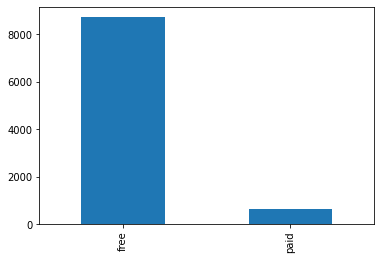

In [23]:
# Menghitung jumlah aplikasi untuk tiap tipe dan menampilkannya dalam diagram batang
df["type"].value_counts().sort_index().plot.bar()

Menggunakan plot pie untuk menampilkan perbandingan jumlah instal aplikasi untuk kategori game, social, edikasi, dating

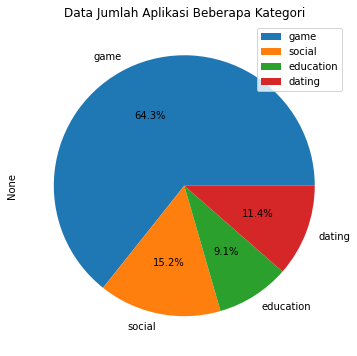

In [24]:
# Menghitung jumlah aplikasi untuk tiap kategori dan, memfilter untuk hanya menggunakan 
# kategori tertentu kemudian membuat diagram lingkaran dari data kelompok kategori tersebut
temp = df.groupby('category').size()
temp = temp.filter(items=["game", "social","shoping","education","dating"])
temp.plot(kind="pie", figsize=(6,6), autopct='%1.1f%%', legend=True, title="Data Jumlah Aplikasi Beberapa Kategori")

## 4.Deskripsi Informasi Statistik

In [25]:
# Menampilkan nilai rata-rata pada kolom rating, dan juga kolom size
df[["rating", "size"]].mean()

rating     4.191838
size      30.782328
dtype: float64

In [26]:
# Menampilkan kategori yang memiliki jumlah aplikasi terbanyak
cat = df.groupby('category').size()
[cat.idxmax(),cat.max()]

['family', 1746]

In [27]:
# Menampilkan informasi max, median, mean, dan min dari kolom installs
df.agg({"installs":["max","median","mean","min"]})

,installs
max,1.000000e+09
median,5.000000e+05
mean,1.790875e+07
min,1.000000e+00


In [28]:
# Menampilkan informasi rata-rata rating tiap kategori
df[["category","rating"]].groupby("category").mean().reset_index()

,category,rating
0,art_and_design,4.377049
1,auto_and_vehicles,4.190411
2,beauty,4.278571
3,books_and_reference,4.346067
4,business,4.121452
5,comics,4.155172
6,communication,4.158537
7,dating,3.970769
8,education,4.389032
9,entertainment,4.126174


In [29]:
# Menampilkan informasi statistik dari kolom bertipe data object
df.describe(include="object")

,app,category,type,content_rating,genres,last_updated,current_ver,android_ver
count,9360,9360,9360,9360,9360,9360,9360,9360
unique,8174,33,2,6,115,1299,2638,31
top,roblox,family,free,everyone,tools,"august 3, 2018",varies with device,4.1 and up
freq,9,1746,8715,7414,732,319,1415,2059


In [30]:
# Menampilkan informasi statistik dari kolom bertipe numerik
df.describe()

,rating,reviews,size,installs,price,count_genre
count,9360.000000,9.360000e+03,9360.000000,9.360000e+03,9360.000000,9360.000000
mean,4.191838,5.143767e+05,30.782328,1.790875e+07,0.961286,1.051603
std,0.515263,3.145023e+06,86.142334,9.126637e+07,15.822662,0.221235
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000
25%,4.000000,1.867500e+02,2.900000,1.000000e+04,0.000000,1.000000
50%,4.300000,5.955000e+03,11.000000,5.000000e+05,0.000000,1.000000
75%,4.500000,8.162750e+04,30.000000,5.000000e+06,0.000000,1.000000
max,5.000000,7.815831e+07,994.000000,1.000000e+09,400.000000,2.000000
